In [23]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
os.chdir("C:\\Users\\Utkarsh\\Downloads")
data=pd.read_csv('musk_csv.csv')

In [3]:
X=data.loc[:,'f1':'f166']
Y=data.loc[:,'class']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [5]:
#max_depth was selected after looping in range 50
model=RandomForestClassifier(max_depth=26,random_state=20) 

In [19]:
#Random Forest with depth and random state in local optimum of range 1 to 50
rf={}
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
rf['accuracy']=accuracy_score(y_test,y_pred)
rf['f1_score']=f1_score(y_test,y_pred)
rf['precision']=precision_score(y_test,y_pred)
rf['recall']=recall_score(y_test,y_pred)
print(rf)   

{'accuracy': 0.9765151515151516, 'f1_score': 0.9168900804289545, 'precision': 0.9884393063583815, 'recall': 0.855}


In [22]:
#with MinMaxScaler and Random Forest
mmscaler=MinMaxScaler()
X_scaled=mmscaler.fit_transform(x_train)
model.fit(X_scaled,y_train)
X_testscaled=mmscaler.fit_transform(x_test)
print('accuracy with scaled values',accuracy_score(y_test,model.predict(X_testscaled)))

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


accuracy with scaled values 0.9712121212121212


D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
#Random Forest after dropping correlated features
#output ..accuracy and other evaluations on test set
corr_matrix = X.corr().abs()
rfcorr={}

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
X_corr=X.drop(X[to_drop],axis=1)
x_corrtrain,x_corrtest,y_corrtrain,y_corrtest=train_test_split(X_corr,Y,test_size=0.2,random_state=12)
model.fit(x_corrtrain,y_corrtrain)
y_corrpred=model.predict(x_corrtest)
rfcorr['accuracy']=accuracy_score(y_corrtest,y_corrpred)
rfcorr['f1_score']=f1_score(y_corrtest,y_corrpred)
rfcorr['precision']=precision_score(y_corrtest,y_corrpred)
rfcorr['recall']=recall_score(y_corrtest,y_corrpred)
print(rfcorr)  

{'accuracy': 0.9787878787878788, 'f1_score': 0.9263157894736842, 'precision': 0.9777777777777777, 'recall': 0.88}


In [17]:
#multilayer perceptron MLP based approach
nmodel = Sequential()
nmodel.add(Dense(128, input_shape=(166,), activation='relu'))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dropout(0.2))
nmodel.add(Dense(64, activation='relu'))
nmodel.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.optimizers import RMSprop
X_sc=mmscaler.fit_transform(x_train)
X_sctest=mmscaler.fit_transform(x_test)
nmodel.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])
nmodel.summary()

history=nmodel.fit(X_sc,y_train,validation_data=(X_sctest,y_test),epochs=100)
score = nmodel.evaluate(X_testscaled,y_test)
print(score)

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               21376     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total para

5278/5278 [==============================] - 0s 87us/sample - loss: 0.0521 - acc: 0.9814 - val_loss: 0.0751 - val_acc: 0.9720
Epoch 51/100
5278/5278 [==============================] - 0s 90us/sample - loss: 0.0485 - acc: 0.9814 - val_loss: 0.0675 - val_acc: 0.9758
Epoch 52/100
5278/5278 [==============================] - 0s 90us/sample - loss: 0.0500 - acc: 0.9826 - val_loss: 0.0788 - val_acc: 0.9712
Epoch 53/100
5278/5278 [==============================] - 0s 90us/sample - loss: 0.0441 - acc: 0.9831 - val_loss: 0.0731 - val_acc: 0.9705
Epoch 54/100
5278/5278 [==============================] - 1s 104us/sample - loss: 0.0435 - acc: 0.9831 - val_loss: 0.0752 - val_acc: 0.9742
Epoch 55/100
5278/5278 [==============================] - 0s 86us/sample - loss: 0.0465 - acc: 0.9822 - val_loss: 0.0644 - val_acc: 0.9735
Epoch 56/100
5278/5278 [==============================] - 1s 107us/sample - loss: 0.0407 - acc: 0.9839 - val_loss: 0.0633 - val_acc: 0.9758
Epoch 57/100
5278/5278 [==============

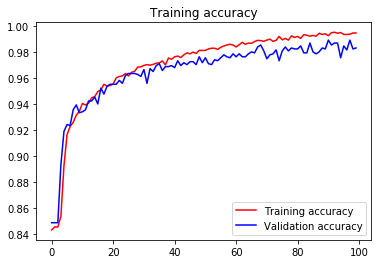

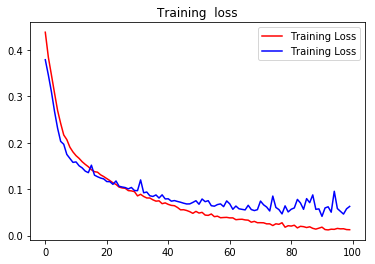

In [18]:
import matplotlib.pyplot as plt
nn={}
ac = history.history['acc']
vac=history.history['val_acc']
loss = history.history['loss']
vloss=history.history['val_loss']
epochs = range(len(ac))
plt.plot(epochs, ac, 'r', label='Training accuracy')
plt.plot(epochs, vac, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, vloss, 'b', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()

 MLP and Random Forest based approach performs really well on training and test/validation sets after tuning of hyperparams and dropping high correlation features. 
 Training CNNs is more costly in reference to computational costs.